## Rapport Technique de l’SAE 1.02 ( séance TP2) : S'initier aux réseaux informatiques - Groupe 10
Dans cette maquette, L’architecture repose sur un routeur Cisco série 800 et un switch Cisco 2960, conformément aux équipements imposés. Le switch constitue le point central du réseau local et permet de connecter l’ensemble des postes et équipements de l’entreprise.

travail personel **- Le fichier de simulation Cisco Packet Tracer (.pkt) est joint à ce README et permet de visualiser et tester l’ensemble de la maquette réseau ainsi que les configurations mises en place-**
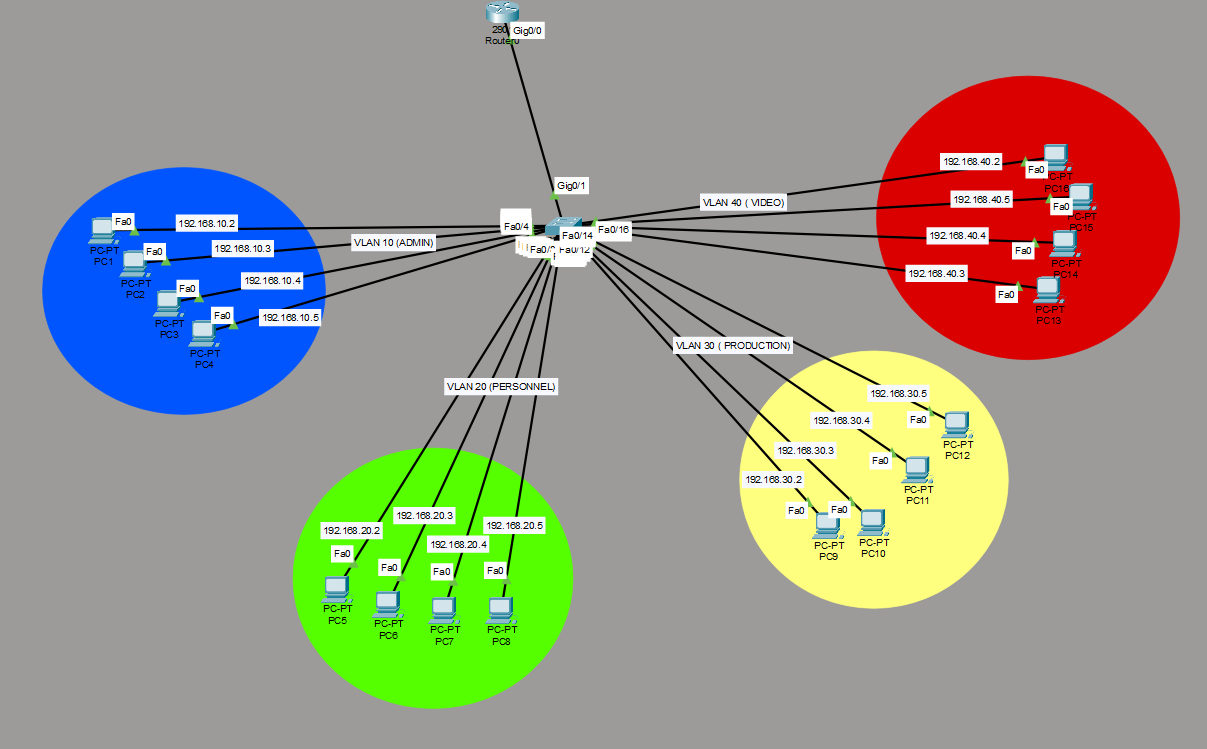

## 1. Organisation du réseau par VLAN
Afin de séparer les différents usages du réseau, une segmentation logique a été mise en place à l’aide de VLANs, comme demandé dans le cahier des charges :
- VLAN 10 – ADMIN : réseau réservé aux administrateurs informatiques. Il héberge également le serveur web interne contenant une page statique de présentation de l’entreprise.
- VLAN 20 – PERSONNEL : réseau destiné aux postes des employés.
- VLAN 30 – PRODUCTION : réseau utilisé pour les machines de production de l’usine.
- VLAN 40 – VIDEO : réseau dédié au transport des flux vidéo internes.

VLAN 800 : réseau utilisé pour l’accès à Internet, déjà existant dans l’entreprise.

Chaque VLAN dispose de son propre plan d’adressage IPv4, ce qui permet une meilleure organisation du réseau, limite les conflits d’adresses et améliore la lisibilité de l’infrastructure. Cette séparation logique renforce également la sécurité en isolant les différents types de trafic.

### - Création des VLANs sur le switch
Les commandes suivantes sont exécutées dans le terminal CLI du switch Cisco 2960

In [ ]:
enable
configure terminal
vlan 10
 name ADMIN
exit
vlan 20
 name PERSONNEL
exit
vlan 30
 name PRODUCTION
exit
vlan 40
 name VIDEO
exit
vlan 800
 name INTERNET
exit

### - Configuration des ports en mode ACCESS

Chaque port du switch est associé à un VLAN en fonction du type d’équipement connecté (On fait la même chose pour toutes les interfaces)
- Exemple :

In [ ]:
interface range fastEthernet0/1 - 4
 switchport mode access
 switchport access vlan 10
exit

### - Configuration du port TRUNK vers le routeur

Le lien entre le switch et le routeur est configuré en mode trunk afin de transporter tous les VLANs

In [ ]:
interface fastEthernet0/24
 switchport mode trunk
 switchport trunk allowed vlan 10,20,30,40,800
exit

### - Commandes de vérification des VLANs

Les commandes suivantes permettent de vérifier la bonne configuration des VLANs :

In [ ]:
show vlan brief
show interfaces trunk

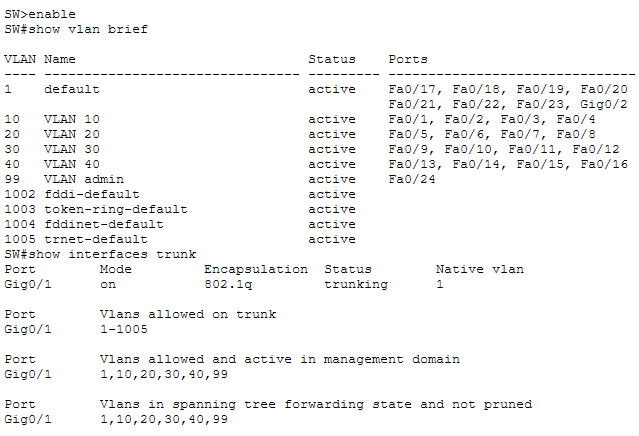

## 2. Rôle du routeur et des services réseau

Le routeur Cisco série 800 assure le routage inter-VLAN, permettant aux différents réseaux de communiquer entre eux lorsque cela est nécessaire. Il héberge également le serveur DHCP, qui attribue automatiquement les adresses IP aux machines de chaque VLAN, simplifiant ainsi la gestion du réseau et évitant les erreurs de configuration manuelle.

Un serveur DNS est accessible afin de permettre la résolution des noms de domaine, et l’accès à Internet est assuré via le VLAN 800, conformément aux exigences du projet.

## 3. Justification du choix d’un seul switch

Dans le contexte d’une petite entreprise, cette solution présente plusieurs avantages :
- simplicité de mise en œuvre et d’administration
- réduction des coûts matériels 
- facilité de maintenance 
- performances suffisantes pour le nombre d’équipements connectés

Dans des structures plus importantes, plusieurs switches seraient nécessaires, mais vu que c'est une petite entreprise l’utilisation d’un seul switch constitue la démarche méthodologique la plus appropriée.

## 4. Justification du choix d’un seul routeur

L’architecture réseau repose sur un seul routeur Cisco série 800, ce choix étant justifié par le contexte du projet aussi

Raisons principales :

- l’entreprise est de petite taille
- un seul routeur suffit pour assurer : le routage inter-VLAN, le service DHCP, l’accès à Internet via le VLAN 800
- la configuration est plus simple à administrer et les coûts matériels sont réduits.

## 5. Configuration du service DHCP sur le routeur

Le service DHCP est configuré directement sur le routeur Cisco série 800.
Un pool DHCP est créé pour chaque VLAN afin d’attribuer automatiquement les paramètres réseau aux postes clients.

### 5.1 Exclusion des adresses IP réservées
Certaines adresses IP sont exclues du DHCP afin d’être réservées aux équipements critiques (routeur, serveurs).

In [ ]:
ip dhcp excluded-address 192.168.10.1 192.168.10.10
ip dhcp excluded-address 192.168.20.1 192.168.20.10
ip dhcp excluded-address 192.168.30.1 192.168.30.10
ip dhcp excluded-address 192.168.40.1 192.168.40.10

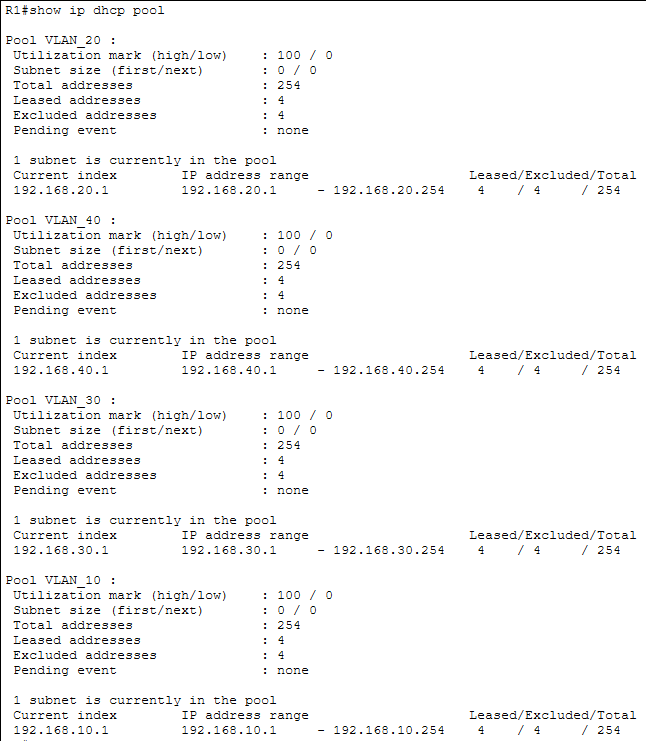

### 5.2 Création des pools DHCP
- VLAN 10 – ADMIN

In [ ]:
ip dhcp pool ADMIN
 network 192.168.10.0 255.255.255.0
 default-router 192.168.10.1
 dns-server 192.168.10.2

- VLAN 30 – PRODUCTION

In [ ]:
ip dhcp pool PRODUCTION
 network 192.168.30.0 255.255.255.0
 default-router 192.168.30.1
 dns-server 192.168.10.2

- VLAN 40 – VIDEO

In [ ]:
ip dhcp pool VIDEO
 network 192.168.40.0 255.255.255.0
 default-router 192.168.40.1
 dns-server 192.168.10.2

### 5.3 Commandes de vérification DHCP

Les commandes suivantes permettent de vérifier le bon fonctionnement du service DHCP : (dans le CLI)

In [ ]:
show ip dhcp pool
show ip dhcp binding
show running-config | section dhcp

## 6. Suppression des adresses IP configurées manuellement sur les postes

Les adresses IP configurées manuellement sur les postes clients ont été supprimées afin d’activer le fonctionnement normal du service DHCP.
#### Raisons de ce choix :
- le cahier des charges impose la mise en place d’un serveur DHCP 
- DHCP permet une attribution automatique et centralisée des adresses IP 
- cela réduit les erreurs de configuration manuelle et facilite l’ajout ou le déplacement de postes dans le réseau.